<a href="https://colab.research.google.com/github/Hafsa642/Machine-learning-project-/blob/main/fraud_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/creditcard.csv")


In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn xgboost joblib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

display settings

In [ ]:
pd.set_option('display.max_columns', 200)
sns.set(style="whitegrid")
RANDOM_STATE = 42

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


class distribution - show imbalance clearly

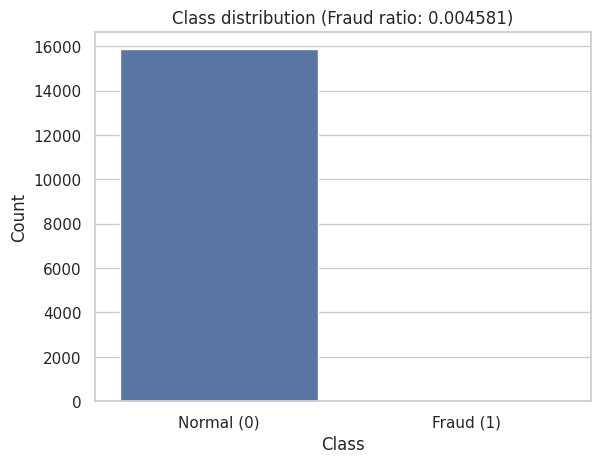

In [ ]:

sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts().values)
plt.xticks([0,1], ["Normal (0)","Fraud (1)"])
plt.ylabel("Count"); plt.title(f"Class distribution (Fraud ratio: {df['Class'].mean():.6f})")
plt.show()


summary statistics for Amount and Time

In [ ]:
df[['Amount','Time']].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,15935.0,66.390222,189.355098,0.0,5.49,15.95,53.89,7712.43
Time,15936.0,12121.217871,8982.283843,0.0,3633.50,10980.00,20621.50,27371.00


Correlation heatmap (small sample or top correlations) - beware of too dense plots

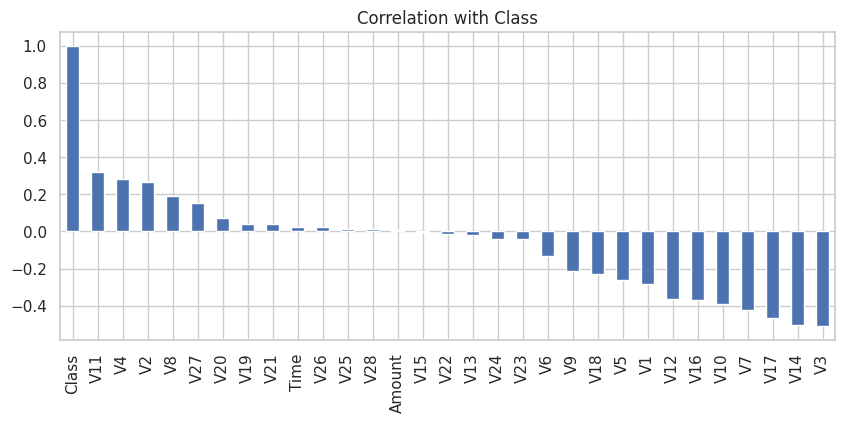

In [ ]:

df.corr()['Class'].sort_values(ascending=False).plot.bar(figsize=(10,4), title='Correlation with Class')
plt.show()


Visualize distributions of Amount for fraud vs non-fraud

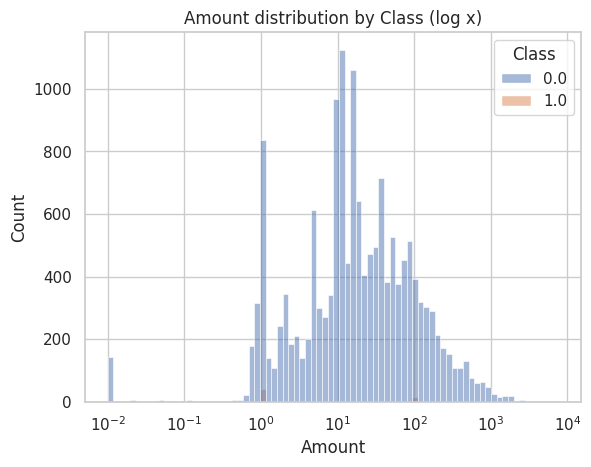

In [ ]:

sns.histplot(df, x='Amount', hue='Class', bins=80, log_scale=(True,False)).set(title="Amount distribution by Class (log x)")
plt.show()


PCA 2D plot

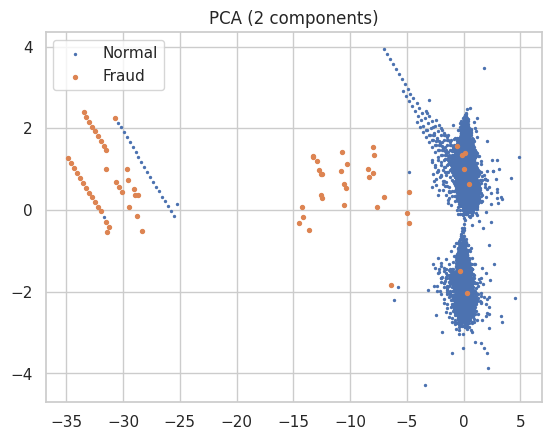

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df.drop(['Class','Time'], axis=1).fillna(df.mean())  # fill NaNs with column mean
X_pca = PCA(2, random_state=RANDOM_STATE).fit_transform(StandardScaler().fit_transform(X))
y = df['Class'].to_numpy()
plt.scatter(X_pca[y==0,0], X_pca[y==0,1], s=2, label="Normal"); plt.scatter(X_pca[y==1,0], X_pca[y==1,1], s=8, label="Fraud"); plt.legend(); plt.title("PCA (2 components)"); plt.show()


Save EDA summary

In [ ]:
counts = df['Class'].value_counts()
pd.Series({'total_transactions':len(df),'fraud_transactions':int(counts.get(1,0)),'normal_transactions':int(counts.get(0,0)),'fraud_ratio':counts.get(1,0)/counts.sum()}, name="value").to_frame().to_csv("eda_summary.csv"); print("Saved eda_summary.csv and figures for the report.")


Saved eda_summary.csv and figures for the report.
